In [1]:
import numpy as np
import cv2 as cv
import glob

In [2]:
import matplotlib.pyplot as plt

In [3]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
# Define the chess board rows and columns
rows = 11
cols = 8

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows*cols,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:cols].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [6]:
images = glob.glob('*.bmp')

In [7]:
import cv2
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (rows, cols), None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, (rows, cols), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

In [8]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [9]:
mtx

array([[2.51871226e+03, 0.00000000e+00, 1.08045518e+03],
       [0.00000000e+00, 2.51898572e+03, 8.10445150e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [10]:
rvecs

(array([[ 0.08408605],
        [-0.22289696],
        [ 0.34257825]]),
 array([[-0.13263158],
        [ 0.03787585],
        [ 0.08311908]]))

In [11]:
tvecs

(array([[-0.92128639],
        [-4.70643807],
        [32.50237739]]),
 array([[-1.45624132],
        [-3.14147107],
        [36.32171909]]))

In [12]:
R1 = cv.Rodrigues(rvecs[0])[0]
R2 = cv.Rodrigues(rvecs[1])[0]

In [13]:
R1

array([[ 0.91768338, -0.34195928, -0.20228956],
       [ 0.32348712,  0.93868232, -0.11929619],
       [ 0.23068007,  0.04403806,  0.97203259]])

In [14]:
R2

array([[ 0.99583733, -0.08526661,  0.03221214],
       [ 0.08025393,  0.98777649,  0.13362974],
       [-0.04321255, -0.13048833,  0.99050768]])

In [15]:
tvec1 = tvecs[0].squeeze()
tvec2 = tvecs[1].squeeze()

In [16]:
tvec1

array([-0.92128639, -4.70643807, 32.50237739])

In [17]:
tvec2

array([-1.45624132, -3.14147107, 36.32171909])

In [19]:
H1 = np.dot(mtx, np.concatenate((R1[:,:2], tvec1[:,None]), axis = 1) )/tvec1[-1]
H2 = np.dot(mtx, np.concatenate((R2[:,:2], tvec2[:,None]), axis = 1) )/tvec2[-1] 

In [20]:
H1

array([[ 7.87825404e+01, -2.50355801e+01,  1.00906178e+03],
       [ 3.08227602e+01,  7.38474534e+01,  4.45688747e+02],
       [ 7.09732922e-03,  1.35491809e-03,  1.00000000e+00]])

In [21]:
H2

array([[ 6.77704283e+01, -9.79438387e+00,  9.79472821e+02],
       [ 4.60157437e+00,  6.55927446e+01,  5.92577688e+02],
       [-1.18971659e-03, -3.59257044e-03,  1.00000000e+00]])

In [22]:
H2_inv = np.linalg.inv(H2)

In [23]:
H2_inv

array([[ 1.44035212e-02,  1.33473094e-03, -1.48987893e+01],
       [-1.12864027e-03,  1.46617451e-02, -7.58275052e+00],
       [ 1.30813884e-05,  5.42613035e-05,  9.55033098e-01]])

In [24]:
H = np.dot(H1,H2_inv)

In [25]:
H

array([[ 1.17620208e+00, -2.07158791e-01, -2.02385178e+01],
       [ 3.66439298e-01,  1.14805628e+00, -5.93541121e+02],
       [ 1.13778705e-04,  8.35997920e-05,  8.39017479e-01]])

In [26]:
img1 = cv2.imread('1.bmp', 0)
img2 = cv2.imread('2.bmp', 0)

In [27]:
pts1 = corners.reshape(-1,1,2).astype(np.float32)
dst1 = cv2.perspectiveTransform(pts1, H)

In [28]:
pts1

array([[[ 979.62915,  592.7919 ]],

       [[1048.5057 ,  597.94507]],

       [[1117.7013 ,  603.28406]],

       [[1187.0565 ,  608.66907]],

       [[1256.5367 ,  613.9695 ]],

       [[1326.0482 ,  619.4644 ]],

       [[1395.795  ,  624.9137 ]],

       [[1465.6465 ,  630.35016]],

       [[1535.518  ,  635.7168 ]],

       [[1605.4448 ,  641.28705]],

       [[1675.4097 ,  646.8596 ]],

       [[ 973.2992 ,  660.6599 ]],

       [[1042.3809 ,  665.9693 ]],

       [[1111.8807 ,  671.3873 ]],

       [[1181.4454 ,  676.98206]],

       [[1251.2025 ,  682.40027]],

       [[1321.0782 ,  687.7247 ]],

       [[1391.0511 ,  693.29877]],

       [[1461.0896 ,  698.9029 ]],

       [[1531.2657 ,  704.4069 ]],

       [[1601.4307 ,  709.93   ]],

       [[1671.622  ,  715.5236 ]],

       [[ 966.87286,  729.0249 ]],

       [[1036.3387 ,  734.5553 ]],

       [[1106.0409 ,  740.0329 ]],

       [[1175.9144 ,  745.59644]],

       [[1245.8661 ,  751.1587 ]],

       [[1315.9698 ,  756.66

In [29]:
dst1

array([[[1009.1653 ,  445.976  ]],

       [[1080.1776 ,  473.21796]],

       [[1150.3075 ,  500.3161 ]],

       [[1219.4467 ,  527.07166]],

       [[1287.6199 ,  553.34174]],

       [[1354.6711 ,  579.4051 ]],

       [[1420.8953 ,  605.072  ]],

       [[1486.1729 ,  630.34784]],

       [[1550.4631 ,  655.1595 ]],

       [[1613.7356 ,  679.80505]],

       [[1676.0583 ,  704.07996]],

       [[ 982.79315,  518.9993 ]],

       [[1053.8418 ,  545.7438 ]],

       [[1124.1326 ,  572.2938 ]],

       [[1193.295  ,  598.62006]],

       [[1261.5853 ,  624.38965]],

       [[1328.9257 ,  649.68134]],

       [[1395.2115 ,  674.8555 ]],

       [[1460.5001 ,  699.67926]],

       [[1524.921  ,  724.04724]],

       [[1588.3186 ,  748.05054]],

       [[1650.7346 ,  771.7585 ]],

       [[ 956.4366 ,  591.8183 ]],

       [[1027.6885 ,  618.18774]],

       [[1098.0365 ,  644.1386 ]],

       [[1167.3917 ,  669.8076 ]],

       [[1235.7063 ,  695.0828 ]],

       [[1303.091  ,  719.94

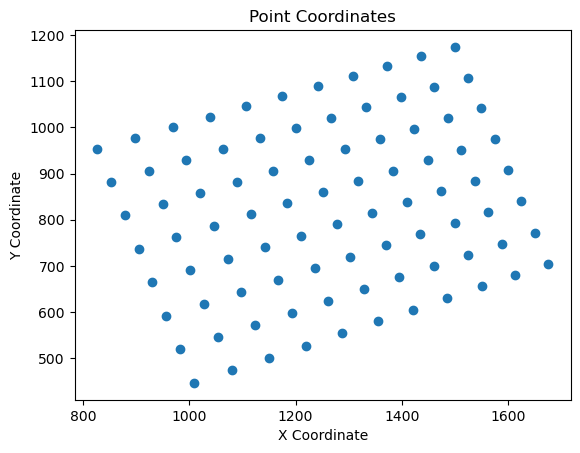

In [31]:
import matplotlib.pyplot as plt

points = [[1009.1653 ,  445.976 ],

       [1080.1776 ,  473.21796],

       [1150.3075 ,  500.3161 ],

       [1219.4467 ,  527.07166],

       [1287.6199 ,  553.34174],

       [1354.6711 ,  579.4051 ],

       [1420.8953 ,  605.072  ],

       [1486.1729 ,  630.34784],

       [1550.4631 ,  655.1595 ],

       [1613.7356 ,  679.80505],

       [1676.0583 ,  704.07996],

       [982.79315,  518.9993 ],

       [1053.8418 ,  545.7438 ],

       [1124.1326 ,  572.2938 ],

       [1193.295  ,  598.62006],

       [1261.5853 ,  624.38965],

       [1328.9257 ,  649.68134],

       [1395.2115 ,  674.8555 ],

       [1460.5001 ,  699.67926],

       [1524.921  ,  724.04724],

       [1588.3186 ,  748.05054],

       [1650.7346 ,  771.7585 ],

       [ 956.4366 ,  591.8183 ],

       [1027.6885 ,  618.18774],

       [1098.0365 ,  644.1386 ],

       [1167.3917 ,  669.8076 ],

       [1235.7063 ,  695.0828 ],

       [1303.091  ,  719.94135],

       [1369.4861 ,  744.66693],

       [1434.9316 ,  768.818  ],

       [1499.4747 ,  792.6385 ],

       [1562.9941 ,  816.25146],

       [1625.455  ,  839.46423],

       [ 930.17487,  664.583  ],

       [1001.5498 ,  690.2827 ],

       [1071.8862 ,  715.80804],

       [1141.4005 ,  740.97876],

       [1209.8167 ,  765.69385],

       [1277.3146 ,  790.14417],

       [1343.8328 ,  814.0947 ],

       [1409.3906 ,  837.776  ],

       [1473.9392 ,  861.21655],

       [1537.5938 ,  884.2831 ],

       [1600.1809 ,  906.87744],

       [ 904.1103 ,  737.05597],

       [ 975.4636 ,  762.3889 ],

       [1045.9712 ,  787.2882 ],

       [1115.3809 ,  811.8758 ],

       [1183.9733 ,  836.1975 ],

       [1251.514  ,  859.99384],

       [1318.1654 ,  883.5406 ],

       [1383.8539 ,  906.68225],

       [1448.5621 ,  929.36584],

       [1512.2518 ,  952.03436],

       [1574.9564 ,  974.1457 ],

       [ 878.13043,  809.4196 ],

       [ 949.55133,  834.0741 ],

       [1020.0548 ,  858.5436 ],

       [1089.684  ,  882.584  ],

       [1158.2949 ,  906.2921 ],

       [1225.926  ,  929.72394],

       [1292.6854 ,  952.6788 ],

       [1358.3903 ,  975.3819 ],
       
       [1423.1271 ,  997.6525 ],

       [1486.9878 , 1019.6041 ],

       [1549.8425 , 1041.1599 ],

       [ 852.13855,  881.4419 ],

       [ 923.65186,  905.72   ],

       [ 994.2487 ,  929.56683],

       [1063.8805 ,  953.0652 ],

       [1132.5736 ,  976.19073],

       [1200.3167 ,  999.0574 ],

       [1267.1597 , 1021.5142 ],

       [1332.9187 , 1043.6796 ],

       [1397.7924 , 1065.4296 ],

       [1461.7245 , 1086.9978 ],

       [1524.6211 , 1108.0619 ],

       [ 826.3546 ,  953.2879 ],

       [ 897.9166 ,  976.9852 ],

       [ 968.5966 , 1000.2843 ],

       [1038.3075 , 1023.3021 ],

       [1107.0802 , 1045.915  ],

       [1174.8309 , 1068.2206 ],

       [1241.7109 , 1090.2134 ],

       [1307.6147 , 1111.8188 ],

       [1372.5508 , 1133.128  ],

       [1436.5973 , 1154.0975 ],

       [1499.5834 , 1174.7115 ]]


# 分离x和y坐标
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# 创建散点图
plt.scatter(x_coords, y_coords)

# 为图表添加标题和坐标轴标签
plt.title('Point Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 显示图表
plt.show()